<a href="https://colab.research.google.com/github/TuanKiet04/Final_Project/blob/main/Analzye2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%pip install facebook_scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.8 MB/s eta 0:00:00
  Created wheel for demjson3: filename=demjson3-3.0.6-py3-none-any.whl size=75280 sha256=ba9b6808d2abb520cf7cb487d2cb991dc4520bb422951ec520bc675c0e09683f
  Stored in directory: /root/.cache/pip/wheels/2d/32/af/75c810e14c7ca0df40c20c662fcc7f33d1e055937b4e452cc1
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=1eee3f3db8209fdb6b056ee96ecb1fbf52b4e4b55e8389e4856ba40a8746233d
  Stored in directory:

In [3]:
# Import thư viện
from facebook_scraper import get_posts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
path="/content/drive/MyDrive/Final Python/Divodivafanvietnam.npy"
post_list = np.load(path,allow_pickle=True)
post_df_full = pd.read_excel("/content/drive/MyDrive/Final Python/Divodivafanvietnam.xlsx")

In [ ]:
to_drop = ['image', 'image_lowquality', 'images', 'images_description', 'images_lowquality',
           'images_lowquality_description', 'video', 'video_duration_seconds', 'video_height',
           'video_id', 'video_quality', 'video_width', 'w3_fb_url', 'image_id', 'image_ids', 'was_live',
           'post_url', 'link', 'links', 'user_id', 'username', 'user_url', 'is_live', 'factcheck',
           'shared_post_id', 'shared_time', 'shared_user_id', 'shared_username', 'shared_post_url',
           'available' , 'video_size_MB', 'video_thumbnail', 'fetched_time', 'sharers', 'header',
           'video_watches', 'shared_text', 'original_text', 'with', 'likes']

post_df_full.drop(to_drop, axis=1, inplace=True)
post_df_full

In [7]:
post_df_full1=post_df_full
post_df_full1[['post_id', 'reactions']]

,post_id,reactions
0,731184905717847,"{'thích': 1803, 'yêu thích': 608, 'haha': 17, ..."
1,731115405724797,"{'thích': 3198, 'yêu thích': 564, 'haha': 39, ..."
2,730996589070012,"{'thích': 1677, 'yêu thích': 19, 'haha': 1349,..."
3,730641742438830,"{'thích': 4018, 'yêu thích': 705, 'haha': 17, ..."
4,730449829124688,"{'thích': 4323, 'yêu thích': 366, 'haha': 37, ..."
...,...,...
95,708267548009583,"{'thích': 1699, 'yêu thích': 39, 'haha': 407, ..."
96,708162288020109,"{'thích': 1969, 'yêu thích': 26, 'haha': 1884,..."
97,707840848052253,"{'thích': 1614, 'yêu thích': 374, 'haha': 4, '..."
98,707355751434096,"{'thích': 4538, 'yêu thích': 650, 'haha': 9, '..."


In [8]:
#Chuyển mỗi thành phần trong reactions thành 1 từ điển
post_df_full1['reactions'] = post_df_full1['reactions'].apply(lambda x : dict(eval(x)) )
#Tạo các thành phần đó thành các cột
data_reactions = post_df_full1['reactions'].apply(pd.Series )
# Các giá trị trả về NaN ta thay bằng 0
data_reactions = data_reactions.fillna(0)

In [ ]:
datafr_reactions = pd.concat([post_df_full1, data_reactions], axis=1).drop('reactions', axis=1)
datafr_reactions[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]

Tìm bài viết có lượt yêu thích cao nhất và bài viết có lượt phẫn nộ nhiều nhất

In [31]:
# Tìm index của dòng có giá trị lớn nhất trong cột 'yêu thích'
max_like_index = datafr_reactions['yêu thích'].idxmax()

most_like_post = datafr_reactions.loc[max_like_index, ['post_text', 'yêu thích']]

print("Bài viết có lượt yêu thích nhiều nhất:")
print(most_like_post['post_text'])
print("Lượt yêu thích:", most_like_post['yêu thích'])

Bài viết có lượt yêu thích nhiều nhất:
Không chỉ là Quán quân Vietnam Idol 2023, Hà An Huy còn là Quán quân của Big Song Big Deal 2022 và đồng thời, bạn cũng là 1 trong những giọng nam hát Falsetto mà Ad thấy là hay nhất nhì nền âm nhạc Việt hiện nay!

Thế nhưng, đêm đăng quang của Huy tại Vietnam Idol lại khá xu khi spotlight hoàn toàn bị chiếm bởi màn trình diễn của Sơn Tùng MTP, Đông Nhi và Mỹ Tâm. Thiệt sự, hôm 21/10 vừa rồi Vietnam Idol đúng kiểu bùng nổ truyền thông, đi đâu ai cũng nhắc nhưng lại chẳng mấy ai nhắc đến chàng Ca sĩ Gen Z sinh năm 2002 này - Buồn của Huy.

Nói vậy chứ, nhìn chung thì việc Huy giành Quán quân cũng là hoàn toàn xứng đáng khi mà hành trình của bạn tại Vietnam Idol là ổn định và phát triển đều đặn nhất. Ở Huy có 1 phong thái "Thần tượng thế hệ mới" với ngoại hình rất dễ cưng, giọng ngọt, tư duy xử lý tiết tấu tốt nhất Show và thực sự, vibe của Hà An Huy chính là thứ mà nền âm nhạc Việt đang cần - Mới mẻ, tươi trẻ, có chất R&B chuẩn USUK.

Với tài năng s

In [32]:
# Tìm index của dòng có giá trị lớn nhất trong cột 'phẫn nộ'
max_angry_index = datafr_reactions['phẫn nộ'].idxmax()

most_angry_post = datafr_reactions.loc[max_angry_index, ['post_text', 'phẫn nộ']]

print("Bài viết có lượt phẫn nộ nhiều nhất:")
print(most_angry_post['post_text'])
print("Lượt phẫn nộ:", most_angry_post['phẫn nộ'])

Bài viết có lượt phẫn nộ nhiều nhất:
Để mà liệt kê những "thằng đàn ông tồi" từng làm cuộc đời của "Công chúa nhạc Pop" - Britney Spears rơi vào hố sâu tuyệt vọng thì Justin Timberlake hẳn là 1 cái tên đầy nổi bật cần phải được nêu lên!

Trong suốt hành trình cuộc đời của mình, Britney chưa bao giờ đá động hay nói xấu Justin trước và kể từ sau khi chia tay, nàng Công chúa của chúng ta vẫn luôn giữ 1 sự tôn trọng đúng mực với "người yêu cũ". Thế nhưng, Justin thì lại chọn 1 cách hành xử hoàn toàn khác và qua đó, nó lột tả được sự thối nát, đốn mạt trong nhân cách của 1 thằng đàn ông là như thế nào. Cụ thể:

1. Ra bài "Cry Me A River" để mỉa mai Britney là một người lừa dối, ngoại tình.
2. Lên phỏng vấn nói về việc bản thân đã từng lấy đi "cái đầu tiên" của 1 ngôi sao nhạc Pop (Ý nói Britney) và cười cợt, khoe khoang nó như 1 chiến tích.
3. Bắt Britney phải phá thai vì bản thân chưa sẵn sàng làm bố (Được trích trong tự truyện sắp ra mắt của Britney).
4. Có nguồn tin cho rằng, Justin còn 

Tìm các từ khóa hay xuất hiện trên các post nhất

In [13]:
# Import thư viện WordCloud
from wordcloud import WordCloud
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [17]:
text = ""
for i in post_df_full['post_text']:
  text=text+i+"\n"

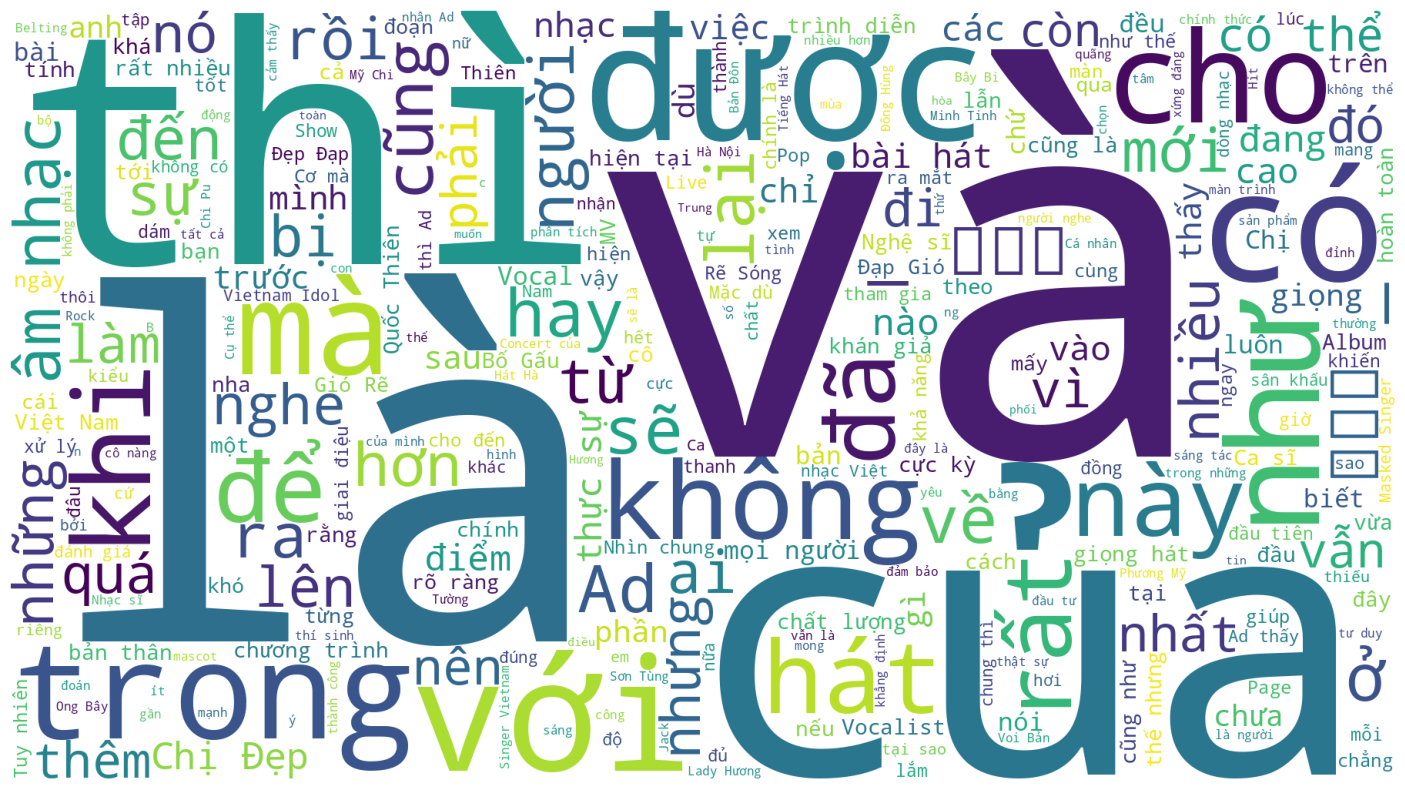

In [34]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                      max_words=300,
                      width=1800, height=1000
                         ).generate(text)
plt.figure(figsize=(30,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Tương quan giữa Reactions với Comment

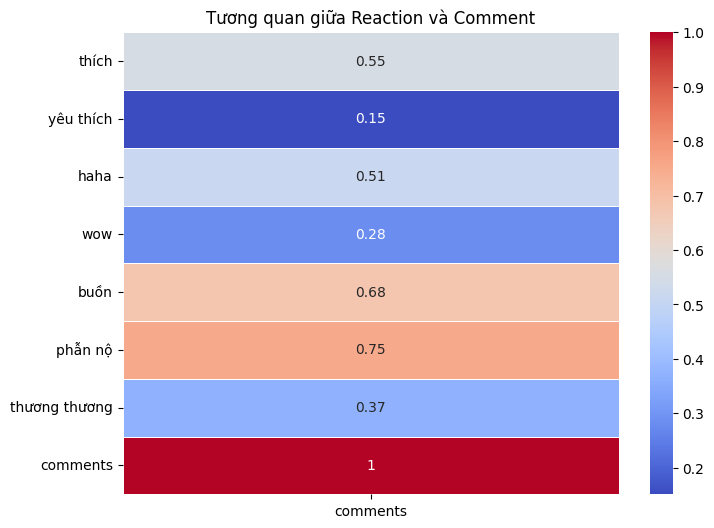

In [27]:
import seaborn as sns

reacts = datafr_reactions[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương', 'comments']]

# Thu thập ma trận tương quan của reactions
data_corr = reacts.corr()

# Thu thập ma trận tương quan của comments
corr_comments = data_corr['comments'].to_frame()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_comments, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Tương quan giữa Reaction và Comment")
plt.show()

Tương quan giữa độ dài bài viết và lượt tương tác

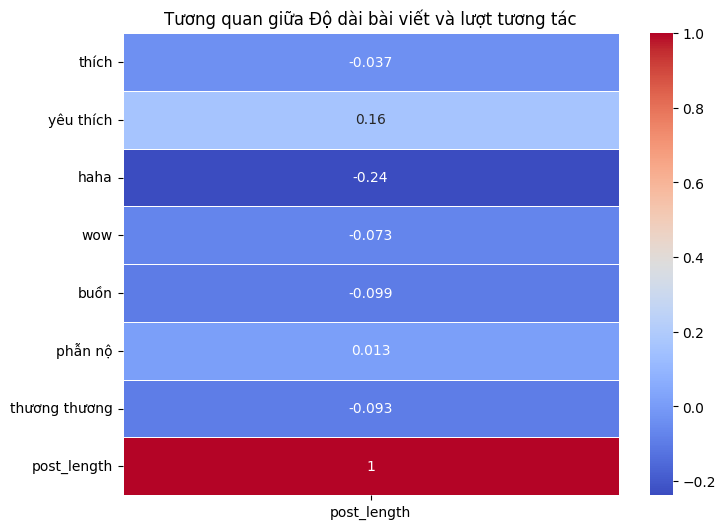

In [48]:
datafr_reactions['post_length'] = datafr_reactions['post_text'].apply(len)

interact = datafr_reactions[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương', 'post_length']]

# Thu thập ma trận tương quan của reactions
_corr = interact.corr()

# Thu thập ma trận tương quan của post_length
corr_post_length = _corr['post_length'].to_frame()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_comments, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Tương quan giữa Độ dài bài viết và lượt tương tác")
plt.show()


Các lượt tương tác với Page theo thời gian

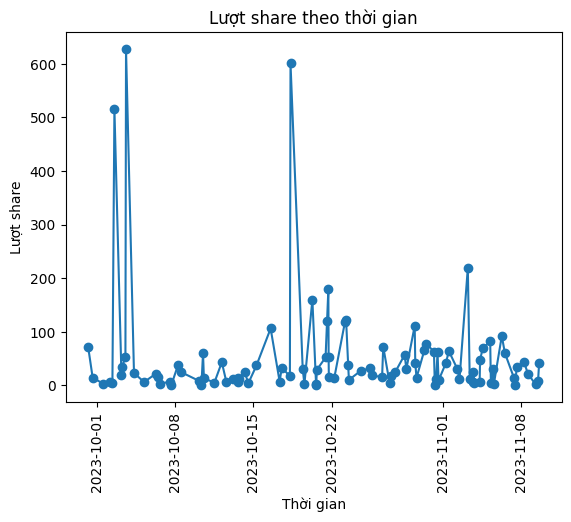

51.62

In [57]:
import matplotlib.pyplot as plt


# Vẽ biểu đồ đường
plt.plot(datafr_reactions['time'], datafr_reactions['shares'], marker='o')

# Đặt tiêu đề và nhãn cho trục x, y
plt.title('Lượt share theo thời gian')
plt.ylabel('Lượt share')
plt.xlabel('Thời gian')

plt.xticks(rotation=90)
# Hiển thị biểu đồ
plt.show()

datafr_reactions['shares'].mean()